# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### A.1 Propose one question relevant to a real-world organizational situation that you will answer using one of the following prediction methods:

Can we predict how many GB of bandwidth a customer will use in a year?

This notebook uses a random forest method in order to predict how many GB of bandwidth a customer will use in a year.

### A.2  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The goal of the data analysis is to predict how many GB of bandwidth a customer will use in a year.
 

# Part II: Method Justification

## B.  Explain the reasons for your chosen prediction method from part A1 by doing the following:

### B.1  Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.

The random forest method was chosen to predict how many GB of bandwidth a customer will use in a year because it is a method that is used on continuous target variables such as the target variable in this notebook 'Avg_Bandwidth_GB_Usage_Per_Year'. The random forest method was chosen over the decisions trees method because the decisions trees method is prone to overfitting and the random forest methods are known to yield better out of sample predictions than decision trees. 

### B.2  Summarize one assumption of the chosen prediction method.
**Random Forest Assumptions**\
https://bccvl.org.au/algorithms-exposed-random-forest/#:~:text=ASSUMPTIONS,are%20ordinal%20or%20non%2Dordinal.
No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.\

**Pros:**\
- One of the most accurate learning algorithms available
- It can handle many predictor variables
- Provides estimates of the importance of different predictor variables
- Maintains accuracy even when a large proportion of the data is missing

**Cons:**\
- Can overfit datasets that are particularly noisy
- For data including categorical predictor variables with different number of levels, random forests are biased in favor of those predictors with more levels. Therefore, the variable importance scores from random forest are not always reliable for this type of data



### B.3  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

Python libraries chosen for this project are:
- **pandas** was used for aesthetics, creating the data frame, and creating the dummy variables.
- **numpy** was used for the square root function which I used in the MSRE calculations.
- **matplitlib** was used for plotting - this was used for learning purposes only
- **seaborn** was used for creating graphs during data exploration.
- **sklearn** was used for building the model.

In [1]:
# Data Exploration, aesthetics, and getDummys
import pandas as pd

# utilized the square root function
import numpy as np

# import matplotlib.pyplot as plt - only used for learning purposes

# create graphs for data exploration
import seaborn as sns

%matplotlib inline

In [2]:
# Data Preparation and Modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Random Forest Method
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
# Aesthetics
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plots for explratory data anlysis
sns.set_style=('whitegrid')

In [5]:
# Read the raw data
churn_data = pd.read_csv('./churn_data/churn_clean.csv', index_col=0)

In [6]:
# Look at the data we have
churn_data.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Part III: Data Preparation

## C.  Perform data preparation for the chosen data set by doing the following:

### C.1  Describe one data preprocessing goal relevant to the prediction method from part A1.
**One preprocessing goal for the data processing relevant to the random forest method is to identify the noise in the data to infer whether the model is prone to overfit or not.**

### C.3  Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.
#### Steps completed to prepare the data for analysis
1. Drop unnecessary columns 
2. Rename columns for clarity
3. Look for missing values
4. Dummy encode the variables 
5. Handle outliers by scaling the features

In [7]:
col_names = churn_data.columns
col_names

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
# Drop unecessary columns
churn_data.drop(['Customer_id', 'UID', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [9]:
churn_data = churn_data.rename(columns={
    "Employment": "Employment_Status", 
    "Marital":"Marital_Status", 
    "Outage_sec_perweek": "Outage_Seconds_Per_Week", 
    "Contacts": "Technical_Support_Contacted_Count",
    "Techie": "Is_Techie",
    "Contract": "Contract_Term",
    "Port_modem": "Has_Port_Modem",
    "Tablet": "Has_Tablet",
    "InternetService": "Internet_Service_Type",
    "Phone":"Has_Phone_Service",
    "Multiple":"Has_Multiple_Lines",
    "OnlineSecurity": "Has_Online_Security",
    "OnlineBackup": "Has_Online_Backup",
    "DeviceProtection": "Has_Device_Protection",
    "TechSupport":"Has_Tech_Support",
    "StreamingTV": "Has_Streaming_TV",
    "StreamingMovies": "Has_Streaming_Movies",
    "PaperlessBilling": "Has_Paperless_Billing",
    "PaymentMethod": "Payment_Method_Type",
    "Population": "Population_Within_A_Mile",
    "Children": "Children_Count",
    "Email": "Email_Sent_To_Customer_Count",
    "Yearly_equip_failure": "Yearly_Equip_Failure_Count",
    "MonthlyCharge": "Avg_Monthly_Charge",
    "Bandwidth_GB_Year": "Avg_Bandwidth_GB_Usage_Per_Year",
})
churn_data.head(1)

,Population_Within_A_Mile,Area,Children_Count,Age,Income,Marital_Status,Gender,Churn,Outage_Seconds_Per_Week,Email_Sent_To_Customer_Count,Technical_Support_Contacted_Count,Yearly_Equip_Failure_Count,Is_Techie,Contract_Term,Has_Port_Modem,Has_Tablet,Internet_Service_Type,Has_Phone_Service,Has_Multiple_Lines,Has_Online_Security,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Streaming_TV,Has_Streaming_Movies,Has_Paperless_Billing,Payment_Method_Type,Tenure,Avg_Monthly_Charge,Avg_Bandwidth_GB_Usage_Per_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611


<AxesSubplot:ylabel='CaseOrder'>

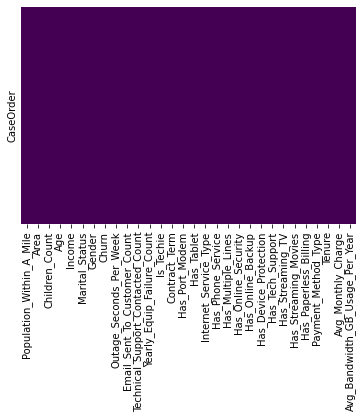

In [10]:
# create heat map to visualize missing data
# the yellow bars stands for null points
sns.heatmap(churn_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# Impute missing fields with the median value
churn_data=churn_data.fillna(churn_data.median())
churn_data.isnull().values.any()

False

### C.2  Identify the initial data set variables that you will use to perform the analysis for the prediction question from part A1, and group each variable as continuous or categorical. 
#### Variables Selected for Analysis (based on previous analysis in D208 Task 1)
**Continuous Variables**
Children_Count, Age, Tenure
<br>
**Categorical Variables**
Has_Multiple_Lines, Has_Streaming_TV, Gender_Male (as compared to Females)

In [12]:
# See how many features we have
print(len(churn_data.columns))

30


In [13]:
# Keep only the variables of importance determined in D208 Task 1 and the target variable
churn_data = churn_data[['Children_Count', 'Age', 'Tenure', 'Has_Multiple_Lines', 'Has_Streaming_TV', 'Gender', 'Avg_Bandwidth_GB_Usage_Per_Year']]

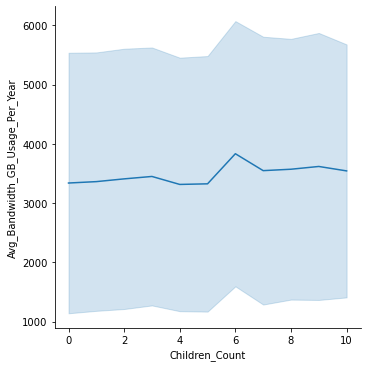

In [14]:
# check for noise in the variables

# represent the  spread of the distribution 
# at each time point by plotting the standard  deviation (instead of a confidence interval)
# https://www.h2kinfosys.com/blog/visualizing-bivariate-distribution-using-seaborn/
x='Children_Count'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', data=churn_data)


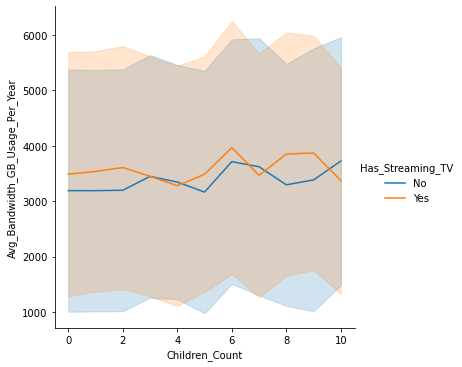

In [15]:
x='Children_Count'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Has_Streaming_TV', data=churn_data)

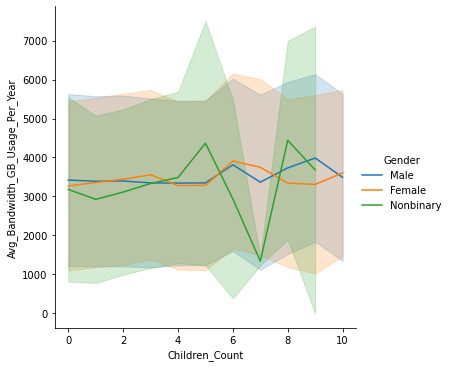

In [16]:
x='Children_Count'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Gender', data=churn_data)

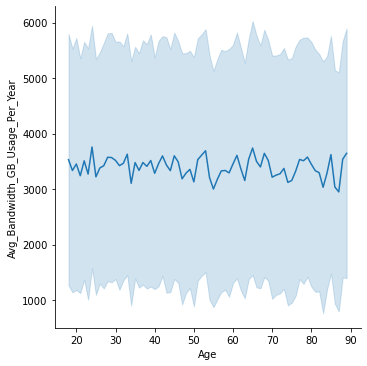

In [17]:
x='Age'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', data=churn_data)

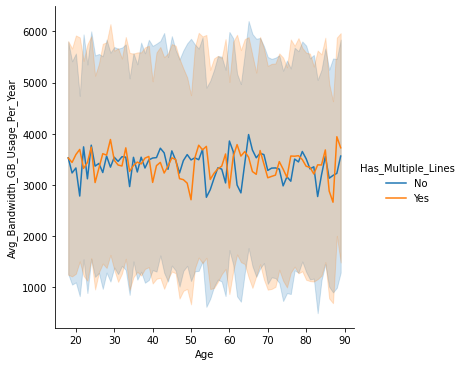

In [18]:
x='Age'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Has_Multiple_Lines', data=churn_data)

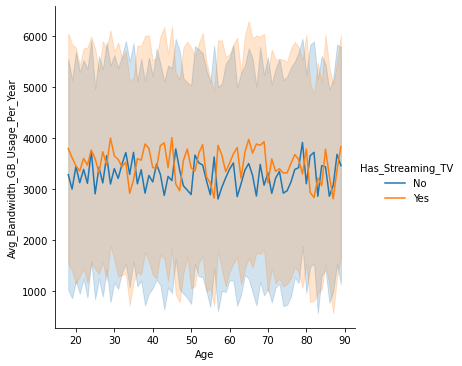

In [19]:
x='Age'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Has_Streaming_TV', data=churn_data)

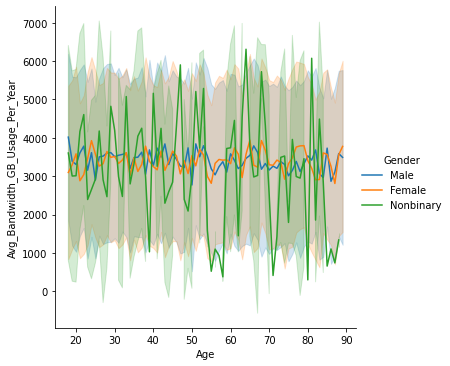

In [20]:
x='Age'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Gender', data=churn_data)

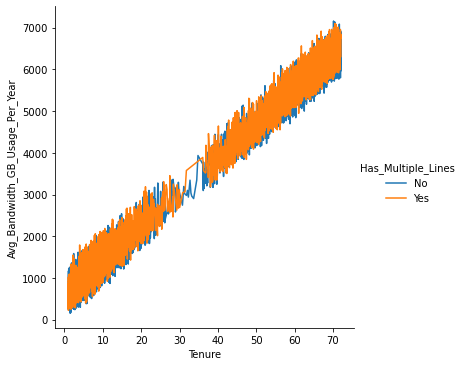

In [21]:
x='Tenure'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Has_Multiple_Lines', data=churn_data)

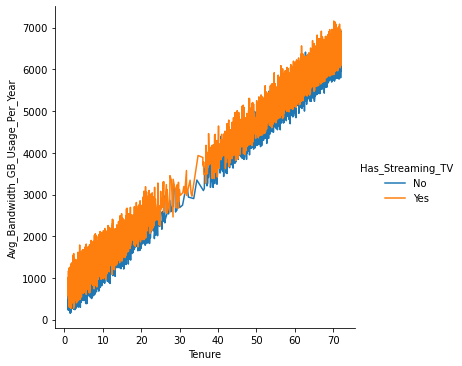

In [22]:
x='Tenure'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Has_Streaming_TV', data=churn_data)

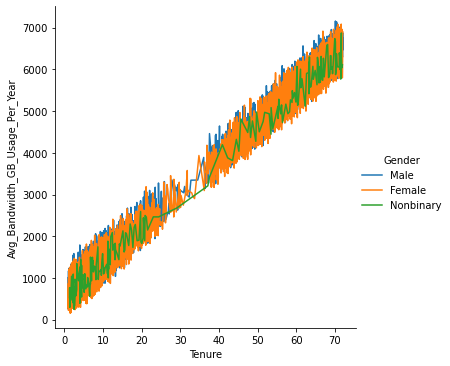

In [23]:
x='Tenure'
y='Avg_Bandwidth_GB_Usage_Per_Year'
sns.relplot(x, y, kind='line', ci='sd', hue='Gender', data=churn_data)

#### Distribution Analysis Outcome
All the features except for Tenure look pretty noisy as compared to our target variable Avg_Bandwidth_GB_Usage_Per_Year. This means that there is a chance the random forest model will overfit the data.

In [24]:
# Prepare the data for modeling
# Dummy encoding for categorical data - needed to scale the features
mapping = {"Yes": 1, "No": 0}
churn_data.replace(mapping, inplace=True)
churn_data = pd.get_dummies(data=churn_data)
churn_data.head()

,Children_Count,Age,Tenure,Has_Multiple_Lines,Has_Streaming_TV,Avg_Bandwidth_GB_Usage_Per_Year,Gender_Female,Gender_Male,Gender_Nonbinary
CaseOrder,,,,,,,,,
1,0,68,6.795513,0,0,904.536110,0,1,0
2,1,27,1.156681,1,1,800.982766,1,0,0
3,4,50,15.754144,1,0,2054.706961,1,0,0
4,1,48,17.087227,0,1,2164.579412,0,1,0
5,0,83,1.670972,0,1,271.493436,0,1,0


In [25]:
churn_data.drop(['Gender_Female', 'Gender_Nonbinary'], axis=1, inplace=True)

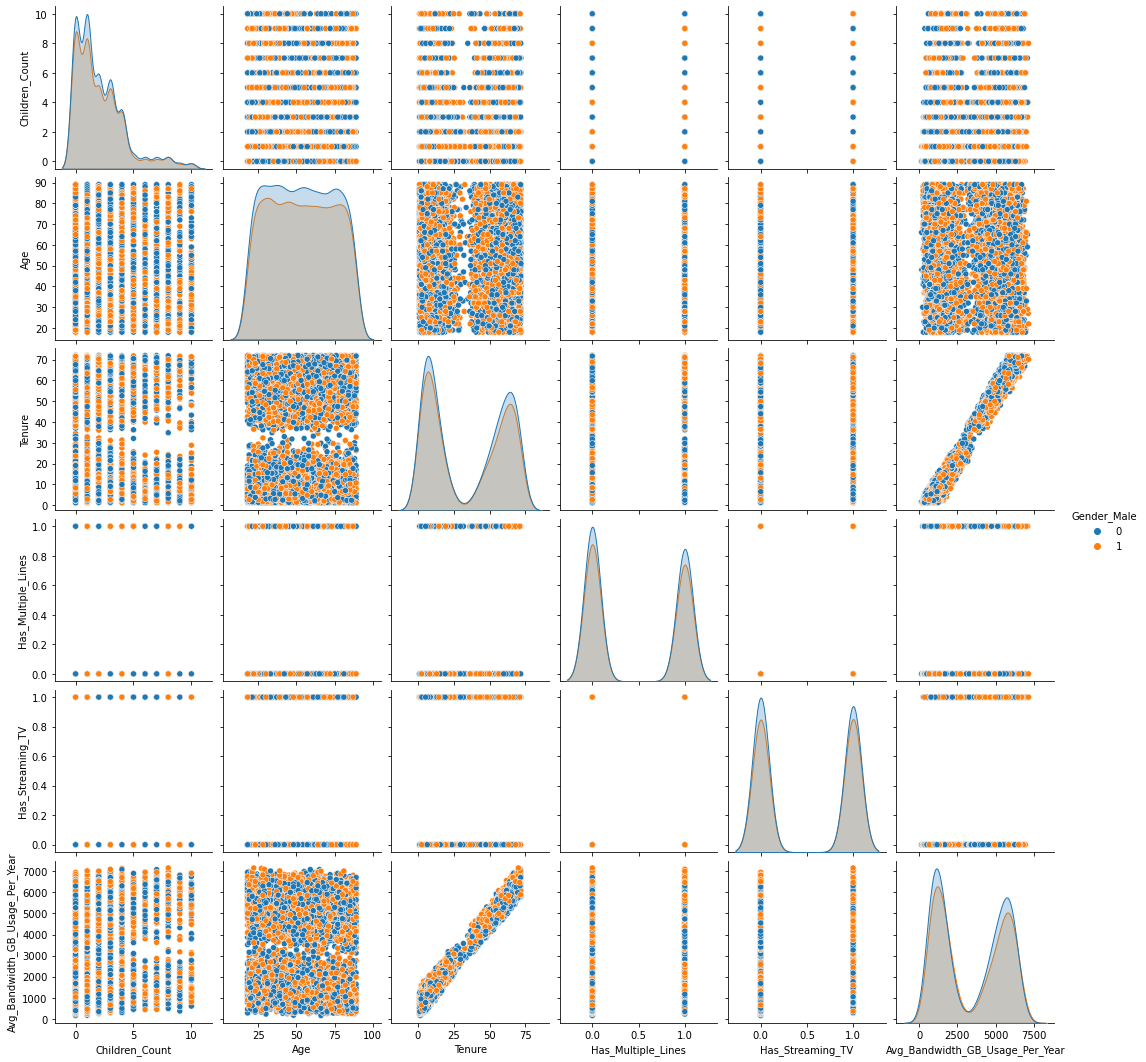

In [26]:
sns.pairplot(churn_data, hue="Gender_Male")

### C.4  Provide a copy of the cleaned data set.


 # Part IV: Analysis

## D.  Perform the data analysis and report on the results by doing the following:

### D.1  Split the data into training and test data sets and provide the file(s).

In [27]:
X = churn_data.drop('Avg_Bandwidth_GB_Usage_Per_Year',axis=1)
y = churn_data['Avg_Bandwidth_GB_Usage_Per_Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### D.2  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

I used visualization tools to appropriately analyze the data as seen previously. After further inspection of the data I noticed there was a lot of noise in the features. This means that there is a chance the random forest model will overfit the data. \ 

Scikit Learn's random forest classifier was used for predicting the average GB of Bandwidth a certain customer might use in a year. From the Scikit Learn documentation on the random forest classifier it is describes as: "A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting." (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) From Scikit Learn's documentation on Decision Trees (DTs) (https://scikit-learn.org/stable/modules/tree.html#tree), decision trees "...are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation." \ 

Both of these explanations were used to select the random forest classifier over the decision tree classifier in order to help control over fitting that decision trees are more prone to. \ 

The random forest classifier was used in this notebook to predict, with an expectation of more predictive accuracy than the decision tree classifier on it's own, the average GB of bandwidth a customer might use in a year with 96% accuracy. The accuracy was determined by the R2 value output from the Scikit Learn metrics r2_score method (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). \ 

Other methods used from the Scikit Learn metrics methods were 
- mean_squared_error - used to return a risk metric corresponding to the expected value of the  squared (quadratic) error or loss (https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
- mean_absolute_error - used to return a risk metric corresponding to the expected value of the absolute error loss (https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)

Functions created manually and with numpy's sqrt (square root) method are:
- Root Mean Square Error (RMSE) - which was used to verify the results by returning the standard deviation of the residuals (prediction errors). "Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit." (https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)
- adj_r2 - is used to analyze whether the R2 value can be trusted. This value is always less than or equal to the R2 value. When useless variables are added to the model the adjusted r-squared will decrease. The adjusted r-squared returned below is only off by a small fraction with indicates that our R2 value can be trusted as accurate. (https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/)


### D.3  Provide the code used to perform the prediction analysis from part D2.

In [28]:
# Random Forest Model
# resource: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
make_regression(n_features=6, n_informative=2, random_state=0, shuffle=False)
radnom_forest = RandomForestRegressor(max_depth=2, random_state=0)
radnom_forest.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [29]:
# resource: https://wgu.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733494#overview

In [30]:
y_predict = radnom_forest.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)

# Root Mean Square Error
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
# Mean Squared Error
MSE = mean_squared_error(y_test, y_predict)
# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_predict)
# Residual Squared
r2 = r2_score(y_test, y_predict)
# Adjusted Residual Squared
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RSME = ',RMSE, '\nMSE =',MSE, '\nMAE = ',MAE, '\nR2 = ',r2, '\nAdjusted R2 = ',adj_r2)

RSME =  416.766 
MSE = 173693.65161722974 
MAE =  331.0433497026439 
R2 =  0.963767360203348 
Adjusted R2 =  0.9636947254426463


In [32]:
# # Lasso Regression - for learning purposes
# from sklearn.linear_model import Lasso, Ridge

# # alpha sets the slope of the line
# regressor_lasso = Lasso(alpha=50)
# regressor_lasso.fit(X_train, y_train)
# print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
# print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

# y_predict = regressor_lasso.predict(X_test)
# y_predict

In [33]:
# k = X_test.shape[1]
# n = len(X_test)

# RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
# MSE = mean_squared_error(y_test, y_predict)
# MAE = mean_absolute_error(y_test, y_predict)
# r2 = r2_score(y_test, y_predict)
# adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# print('RSME = ',RMSE, '\nMSE =',MSE, '\nMAE = ',MAE, '\nR2 = ',r2, '\nAdjusted R2 = ',adj_r2)

In [34]:
# # Ridge Regression - for learning purposes

# # alpha sets the slope of the line
# regressor_ridge = Ridge(alpha=50)
# regressor_ridge.fit(X_train, y_train)
# print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
# print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

# y_predict = regressor_ridge.predict(X_test)
# y_predict

In [35]:
# for learning purposes only
# plt.plot(y_test, y_predict, '^', color = 'b')
# plt.xlim(0,7000)
# plt.ylim(0,7000)

# plt.xlabel("Model Predcitions")
# plt.ylabel("True Value (ground Truth)")
# plt.title("Ridge Regression Predictions")
# plt.show()

In [36]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# from math import sqrt
# for learning purposes only
# k = X_test.shape[1]
# n = len(X_test)

# RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
# MSE = mean_squared_error(y_test, y_predict)
# MAE = mean_absolute_error(y_test, y_predict)
# r2 = r2_score(y_test, y_predict)
# adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# print('RSME = ',RMSE, '\nMSE =',MSE, '\nMAE = ',MAE, '\nR2 = ',r2, '\nAdjusted R2 = ',adj_r2)

# Part V: Data Summary and Implications

## E.  Summarize your data analysis by doing the following:

### E.1  Explain the accuracy and the mean squared error (MSE) of your prediction model.
Note: you can evaluate the "accuracy" of your prediction with MSE, RMSE, and R-Squared to meet the E1 requirement.

#### RSME
Resource: https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error\
RSME - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

Random Forest RSME =  419.656 

#### MSE
Resource: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error\
The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs.

Random Forest MSE = 176111.16616291762 

#### R-Squared (accuracy)
Resource: https://wgu.udemy.com/course/machine-learning-regression-masterclass-in-python/learn/lecture/15158550#overview\
R-squared returns how accurate the model's predictions are. 

Random Forest R2 (accuracy) =  0.9629938547902968 = 96% accurate

### E.2  Discuss the results and implications of your prediction analysis.
The Random Forest model can be used by stakeholders in the company to predict how many GB per year a customer will use on average given that Children_Count, Age, Tenure, Has_Multiple_Lines, Has_Streaming_TV, and Gender are known and input into the model. The result the model returns can be trusted with 96% accuracy. 

### E.3  Discuss one limitation of your data analysis.

The limitations of the data analysis is that the data is pretty noisy. This means that the Random Forest method has a higher chance of overfitting the data which decreases the accuracy of the model.

### E.4  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

From A1 we asked: "Can we predict how many GB of bandwidth a customer will use in a year?" The answer is yes and with 96% accuracy using the Random Forest method based on the R-Squared value. 

It is recommended that the model be used to input customer data with the expectation to receive a result of the predicted number of GB of bandwidth used on average per year by that particular customer. The stakeholders can use the results to make sound business decisions from.

# Part VI: Demonstration

## F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.
 

Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.
 

Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.
 

To submit your recording, upload it to the Panopto drop box titled “Data Mining I – NVM2.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.
 

## G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error \
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error \
https://wgu.udemy.com/course/machine-learning-regression-masterclass-in-python/learn/lecture/15158550#overview \
https://bccvl.org.au/algorithms-exposed-random-forest/#:~:text=ASSUMPTIONS,are%20ordinal%20or%20non%2Dordinal \
https://www.h2kinfosys.com/blog/visualizing-bivariate-distribution-using-seaborn/ \
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html \
https://wgu.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733494#overview \


## H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html \
https://scikit-learn.org/stable/modules/tree.html#tree \ 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html \
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error) \
https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error) \
https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/ \
https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/ 
 
 

## I.  Demonstrate professional communication in the content and presentation of your submission.